In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import math
import controls as ctrl
import pandas as pd
import os

# Defining our endowments

In [2]:
original_task_endowments = ctrl.task_endowments
unique_task_endowments = list(set(ctrl.task_endowments))
unique_task_endowments.sort()
unique_task_endowments

[9, 15, 25, 40, 80, 125]

# Defining our tax rates

In [3]:
tax_rates = []
for i in range(0,11, 1):
    tax_rates.append(i/10)
tax_rates

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculating Public Incomes and Private Productivities

## Calculating Public Contributions

In [4]:
total_public_contributions = []

for tax_rate in tax_rates:
    current_public_contribution = 0 # public contrib for current tax rate
    
    for endowment in original_task_endowments:
        current_public_contribution += tax_rate*endowment # calculating public contrib for current tax rate
        
    total_public_contributions.append(current_public_contribution) # storing current public contrib
    
total_public_contributions

[0.0, 34.9, 69.8, 104.7, 139.6, 174.5, 209.4, 244.3, 279.2, 314.1, 349.0]

## Processing Public Incomes and Private Productivities

In [5]:
theta = 0.025

In [6]:
public_incomes = []
private_productivities = []

for total_public_contribution in total_public_contributions:
    
    if total_public_contribution <= 192:
        # public income for current total contribution
        public_incomes.append(101 / (1 + 100 * math.exp(-theta * total_public_contribution)) - 1)
        # private productivity for current total contribution
        private_productivities.append(ctrl.alpha + ctrl.beta*total_public_contribution)
    else:
        public_incomes.append(101 / (1 + 100 * math.exp(-theta * 192)) - 1)
        private_productivities.append(ctrl.alpha + ctrl.beta*192)

In [7]:
public_incomes

[0.0,
 1.3603343512267108,
 4.469956188096408,
 11.17085992784171,
 23.937734568535316,
 43.40247149717663,
 54.40395032822436,
 54.40395032822436,
 54.40395032822436,
 54.40395032822436,
 54.40395032822436]

In [8]:
# private_productivities

# Calculating Private Incomes

In [9]:
gamma = 0.85

In [10]:
private_incomes = {}

for task_endowment in unique_task_endowments:
    index = 0 # index for calling the private productivity that corresponds to an specific tax rate
    
    private_incomes[f"private_incomes_{task_endowment}"] = [] # list with all the private incomes for a player
    
    for tax_rate in tax_rates: # calculating all the private incomes for an specific player
        private_income = ((task_endowment*(1-tax_rate))**(gamma))*(private_productivities[index])**(gamma)
        private_incomes[f"private_incomes_{task_endowment}"].append(round(private_income, 3))
        index += 1

In [11]:
private_incomes

{'private_incomes_9': [25.423,
  312.214,
  498.948,
  624.399,
  697.039,
  720.153,
  645.657,
  505.596,
  358.2,
  198.724,
  0.0],
 'private_incomes_15': [39.247,
  481.975,
  770.242,
  963.903,
  1076.04,
  1111.721,
  996.72,
  780.504,
  552.965,
  306.776,
  0.0],
 'private_incomes_25': [60.586,
  744.039,
  1189.046,
  1488.006,
  1661.115,
  1716.198,
  1538.666,
  1204.888,
  853.629,
  473.58,
  0.0],
 'private_incomes_40': [90.339,
  1109.424,
  1772.966,
  2218.742,
  2476.862,
  2558.995,
  2294.28,
  1796.588,
  1272.832,
  706.148,
  0.0],
 'private_incomes_80': [162.836,
  1999.739,
  3195.774,
  3999.284,
  4464.545,
  4612.59,
  4135.442,
  3238.352,
  2294.28,
  1272.832,
  0.0],
 'private_incomes_125': [237.957,
  2922.269,
  4670.066,
  5844.256,
  6524.155,
  6740.497,
  6043.228,
  4732.287,
  3352.691,
  1860.022,
  0.0]}

# Obtaining Final Payoffs

In [474]:
final_payoffs = {}

for task_endowment in unique_task_endowments:
    index = 0 # index for calling the private income/public contrib that corresponds to an specific tax rate
    
    final_payoffs[f"final_payoff_{task_endowment}"] = [] # list with all the final_payoffs for a player
    
    for tax_rate in tax_rates: # calculating all the final payoffs for an specific player
        final_payoffs[f"final_payoff_{task_endowment}"].append(round(private_incomes[f"private_incomes_{task_endowment}"][index] 
                                                              +public_incomes[index], 3))
        index += 1

In [475]:
# final_payoffs

# Creating our payoff table

In [476]:
payoffs_db = pd.DataFrame.from_dict(final_payoffs, orient='index')
# payoffs_db.to_excel("payoffs_table.xlsx")

In [477]:
payoffs_db

0         1         2         3         4         5  \
final_payoff_9     25.423   313.574   503.418   635.570   720.977   763.555   
final_payoff_15    39.247   483.335   774.712   975.074  1099.978  1155.123   
final_payoff_25    60.586   745.399  1193.516  1499.177  1685.053  1759.600   
final_payoff_40    90.339  1110.784  1777.436  2229.913  2500.800  2602.397   
final_payoff_80   162.836  2001.099  3200.244  4010.455  4488.483  4655.992   
final_payoff_125  237.957  2923.629  4674.536  5855.427  6548.093  6783.899   

                         6         7         8         9      10  
final_payoff_9     700.061   560.000   412.604   253.128  54.404  
final_payoff_15   1051.124   834.908   607.369   361.180  54.404  
final_payoff_25   1593.070  1259.292   908.033   527.984  54.404  
final_payoff_40   2348.684  1850.992  1327.236   760.552  54.404  
final_payoff_80   4189.846  3292.756  2348.684  1327.236  54.404  
final_payoff_125  6097.632  4786.691  3407.095  1914.426  54.404

# Creating our subplots

<IPython.core.display.Javascript object>


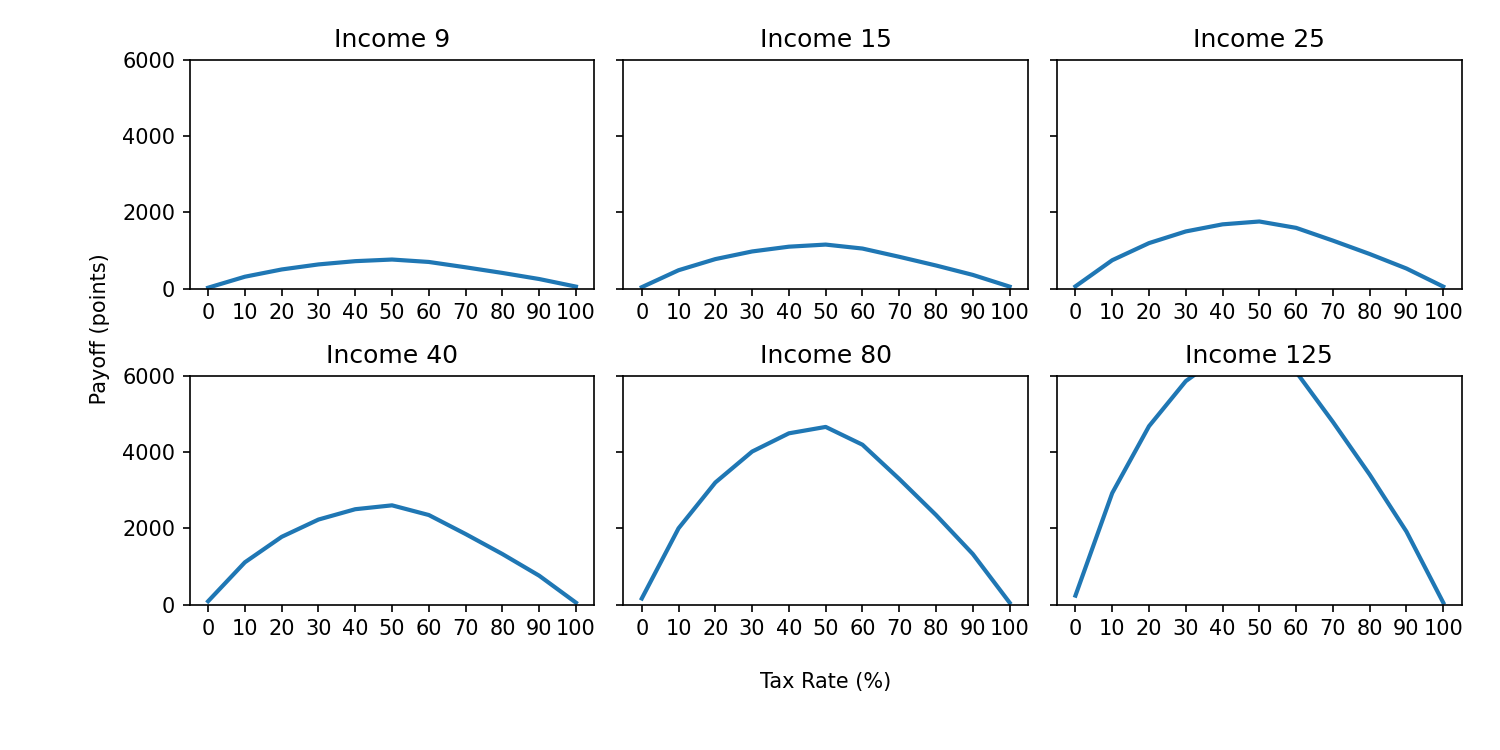

In [478]:
from matplotlib.figure import Figure

# creating a set of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(10, 5))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)

axs = [ax1,ax2,ax3,ax4,ax5,ax6] # storing a subplot for each progressivity level

# plotting all subplots
for n_axis in range(1, len(axs) + 1):
    task_endowment = unique_task_endowments[n_axis-1]
    xvals = [tax_rate*100 for tax_rate in tax_rates] # calling our tax rates for a progressivity level
    
    axs[n_axis-1].plot(xvals, final_payoffs[f"final_payoff_{task_endowment}"], linewidth = 2)
    
    axs[n_axis-1].set_ylim(0, 6000) # setting the y axis limit from 0% to 100%
    axs[n_axis-1].set_title(f"Income {task_endowment}") # setting the title of each subplot as to their respective level   
    
# hiding big subplot tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.tight_layout(pad=1.0)

# stablishing the x and y titles
plt.xlabel("Tax Rate (%)")
plt.tick_params(axis='x', which='major', pad=15) # spacing between x-axis ticks and name
plt.ylabel(" Payoff (points)")
plt.tick_params(axis='y', which='major', pad=15) # spacing between y-axis ticks and name
#plt.title("Possible Incomes without messaging")

# # setting up the progressivity plots
plt.setp(axs, xticks=[tax_rate*100 for tax_rate in tax_rates], xticklabels=[round(tax_rate*100) for tax_rate in tax_rates]) 

fig.tight_layout(pad=1.0) # adding some spacing between subplots
fig.savefig('..\_static\MoneyPolitics\Income plots.png')